# DSCI 311 Project 2 Final Notebook:
## Jon Ng
#### Univsersity of Oregon

In [366]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import os # Used to interact with the file system
from datetime import datetime
from datetime import timedelta
'imports complete'

'imports complete'

In [367]:
#data from kaggle as a zipfile
my_zip = zipfile.ZipFile('archive.zip', 'r')

In [368]:
my_zip.extractall( path="./data")

In [369]:
circuits = pd.read_csv('./data/circuits.csv')
constructor_results = pd.read_csv('./data/constructor_results.csv')
constructor_standings = pd.read_csv('./data/constructor_standings.csv')
constructors = pd.read_csv('./data/constructors.csv')
driver_standings = pd.read_csv('./data/driver_standings.csv')
drivers = pd.read_csv('./data/drivers.csv')
lap_times = pd.read_csv('./data/lap_times.csv')
qualifying = pd.read_csv('./data/qualifying.csv')
races = pd.read_csv('./data/races.csv')
results = pd.read_csv('./data/results.csv')
seasons = pd.read_csv('./data/seasons.csv')
sprint_results = pd.read_csv('./data/sprint_results.csv')
status = pd.read_csv('./data/status.csv')

'all read'

'all read'

# Project 2: Formula 1

### By: Jon Ng - jonn@uoregon.edu

## Initial Analysis

To start off, I am going to do some initial exploring and analysis, by opening data sets and creating pairplots

In [370]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [371]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


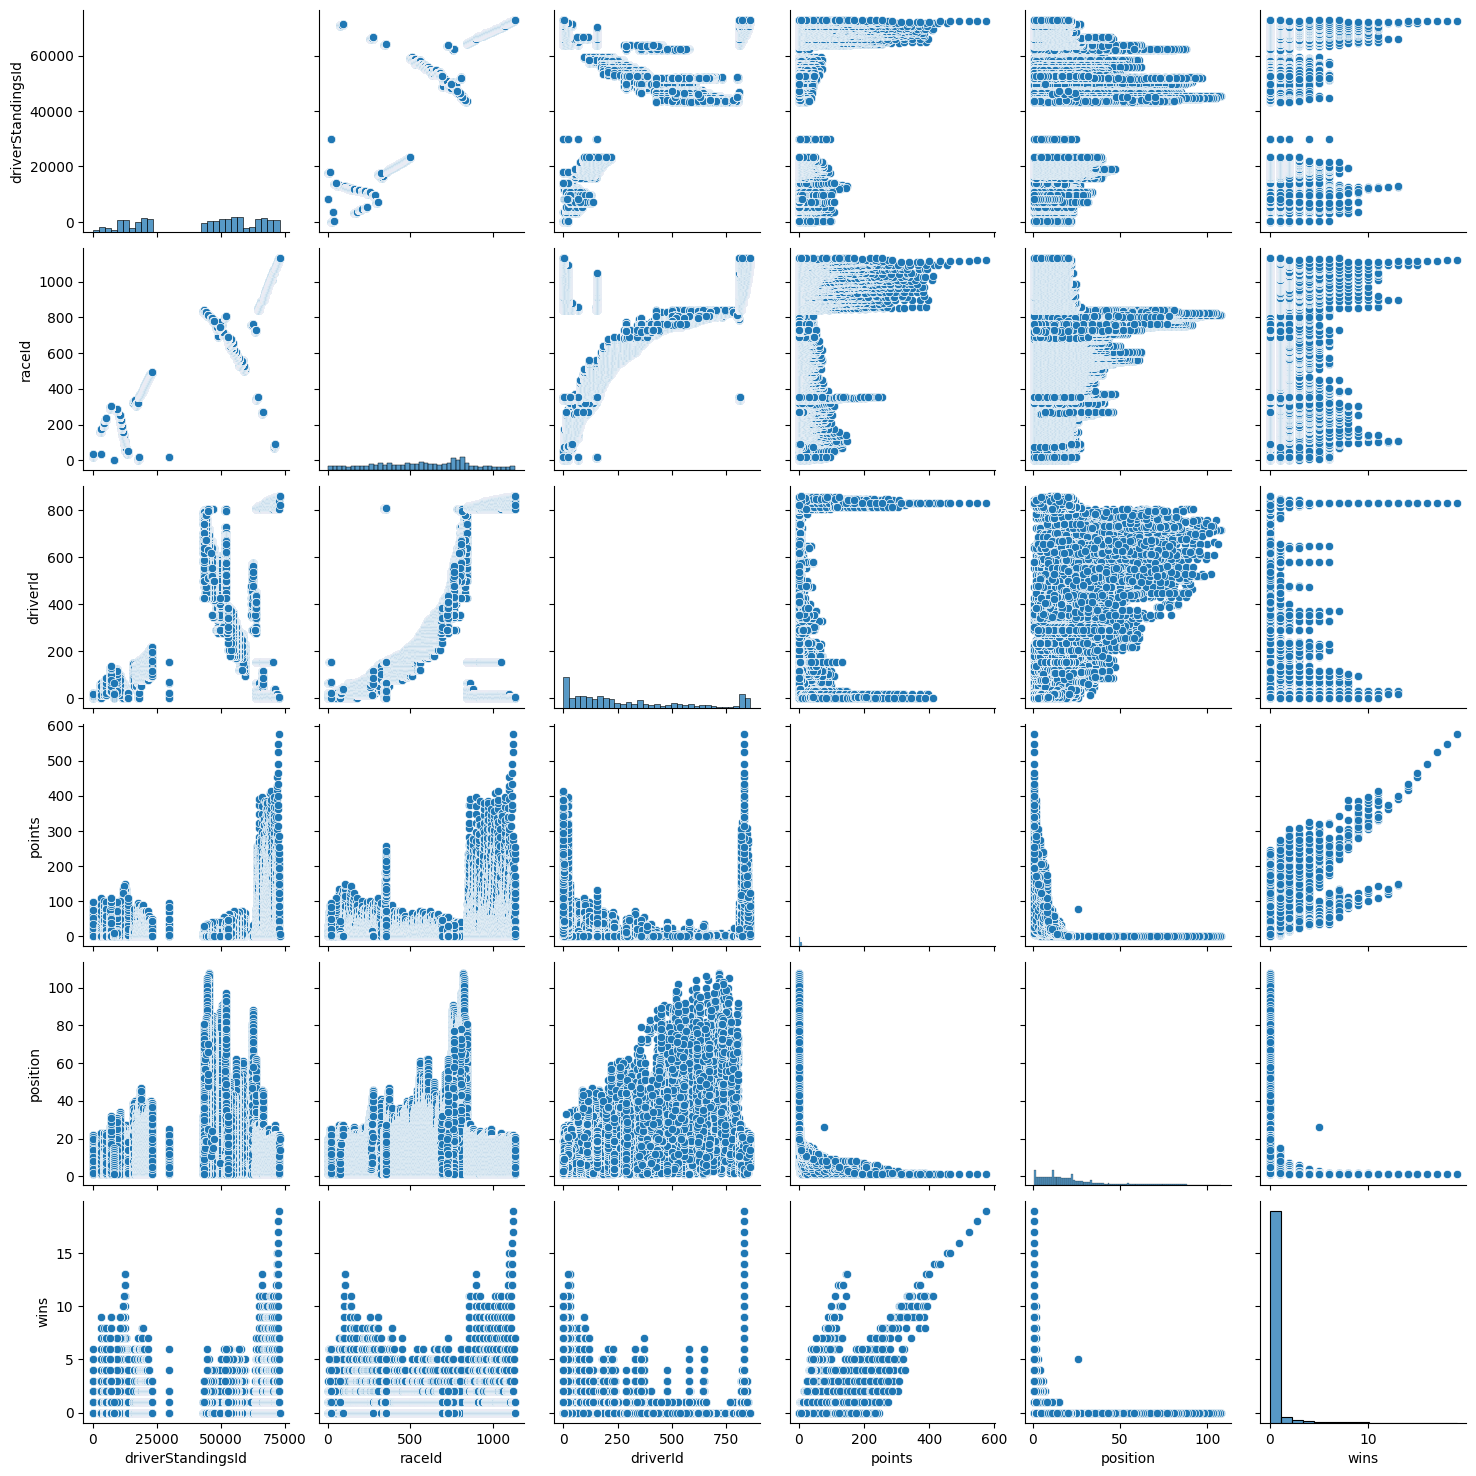

In [372]:
sns.pairplot(driver_standings)

In [373]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


**We will have to change Dates and Times into Datatime objects to do better analysis**

In [374]:
races['date'].dtype

dtype('O')

In [375]:
races['date'] = pd.to_datetime(races['date'])

In [376]:
races['date'].mean()

Timestamp('1993-03-25 13:23:50.400000')

### Findings on inital Analysis

Quickly Assessing the data based on criteria set by on the Exploration assignment. The data at a quick glance seems to be formated correctly for analysis. The only things I may look into adjusting is the time, and dates into a date_time format. Secondly the missing data parts are not formatted in the way we would with Nan, however they are consistantly dated with \N, which is satisfactory for me. Now there is quite a lot of data missing, especially for races, and events that happened much earlier in F1 history and when there must've been less sophisticated data measuring techniques. Therefore despite there being a lot of data missing now, after sorting it to a much narrower range, this issue should be resolved.

So this data set ranges from 1950 to 2024. Now I am personally not interested in looking at data from 1950 as I am more interested in more mordern day Formula 1. As a F1 fan, I know that the most recent team "Haas" joined in 2016. Now you may argue that there are other "newer" team, however, several of these team renamed, or rebranded due to sponsorship changes or new leadership through financial stakehold. Therefore they are the same team, yet rebranded. Therefore I will start by filtering the 'races' csv to >= 2016. Now I may narrow my data set to just the 2022 and 2023 season however to start I will narrow it to the most modern day of F1 which would be year >= 2016. 

After the exploratory assignment, I have decied to further narrow my data from 2016 and beyond to just the 2022 and 2023 season. This is because starting is 2022, the Formula 1 Car regulations and designs were changed, and these rules are the current basis for the 2024 season as well. Therefore looking at these two seasons give us the best comparison to current Formula 1 outcomes.

## Cleaning

In [377]:
# Sorting data for after 2022 (newest rule change)
seasons_2022 = seasons.loc[seasons['year'] >= 2022]
seasons_2022.head()

,year,url
72,2022,http://en.wikipedia.org/wiki/2022_Formula_One_...
73,2023,http://en.wikipedia.org/wiki/2023_Formula_One_...
74,2024,https://en.wikipedia.org/wiki/2024_Formula_One...


In [378]:
races_2022 = races.loc[races['year'] >= 2022]
races_2022.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1036,1074,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,2022-03-18,12:00:00,2022-03-18,15:00:00,2022-03-19,12:00:00,2022-03-19,15:00:00,\N,\N
1058,1075,2022,2,77,Saudi Arabian Grand Prix,2022-03-27,17:00:00,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,2022-03-25,14:00:00,2022-03-25,17:00:00,2022-03-26,14:00:00,2022-03-26,17:00:00,\N,\N
1059,1076,2022,3,1,Australian Grand Prix,2022-04-10,05:00:00,http://en.wikipedia.org/wiki/2022_Australian_G...,2022-04-08,03:00:00,2022-04-08,06:00:00,2022-04-09,03:00:00,2022-04-09,06:00:00,\N,\N
1060,1077,2022,4,21,Emilia Romagna Grand Prix,2022-04-24,13:00:00,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,2022-04-22,11:30:00,2022-04-23,10:30:00,\N,\N,2022-04-22,15:00:00,2022-04-23,14:30:00
1061,1078,2022,5,79,Miami Grand Prix,2022-05-08,19:30:00,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,2022-05-06,18:30:00,2022-05-06,21:30:00,2022-05-07,17:00:00,2022-05-07,20:00:00,\N,\N


In [379]:
races_2022.loc[races_2022['year'] == 2022].shape

(22, 18)

In [380]:
races_2022.loc[races_2022['year'] == 2023].shape

(22, 18)

In [381]:
races_2022.loc[races_2022['year'] == 2024].shape

(24, 18)

In [382]:
# getting a series of all raceid for year 2022, 2023, and 2024
raceID_2022 = races_2022['raceId']

In [383]:
constructor_results_2022 = constructor_results[constructor_results['raceId'].isin(raceID_2022)]
constructor_standings_2022 = constructor_standings[constructor_standings['raceId'].isin(raceID_2022)]
driver_standings_2022 = driver_standings[driver_standings['raceId'].isin(raceID_2022)]
lap_times_2022 = lap_times[lap_times['raceId'].isin(raceID_2022)]
qualifying_2022 = qualifying[qualifying['raceId'].isin(raceID_2022)]
races_2022 = races[races['raceId'].isin(raceID_2022)]
results_2022 = results[results['raceId'].isin(raceID_2022)]

In [384]:
# getting a series of all unique constructorids for year 2022, 2023, 2024
constructor_results_2022_ids = constructor_results_2022['constructorId'].unique()

In [385]:
constructors_2022 = constructors[constructors['constructorId'].isin(constructor_results_2022_ids)]

In [386]:
# getting a series of all unique driverids for year 2022, 2023, 2024
driver_standings_2022_ids = driver_standings_2022['driverId'].unique()

In [387]:
drivers_2022 = drivers[drivers['driverId'].isin(driver_standings_2022_ids)]

In [388]:
drivers_2022

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
19,20,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
452,842,gasly,10,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly
807,807,hulkenberg,27,HUL,Nico,Hülkenberg,1987-08-19,German,http://en.wikipedia.org/wiki/Nico_H%C3%BClkenberg
814,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez
816,817,ricciardo,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,http://en.wikipedia.org/wiki/Daniel_Ricciardo
821,822,bottas,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,http://en.wikipedia.org/wiki/Valtteri_Bottas
824,825,kevin_magnussen,20,MAG,Kevin,Magnussen,1992-10-05,Danish,http://en.wikipedia.org/wiki/Kevin_Magnussen
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen


**Our data is almost there**

Now that we have narrowed down our data to 2022 and beyond, the next step is to drop unnecessary columns, as well and reformat type of columns. I am alsogoing to merge several of these tables with additional information like constructor (team), driver, race circuit, etc, so more data is avaible while looking at a single data frame: 



In [389]:
# dropping unnecessary columns 
seasons_2022 = seasons_2022.drop(columns='url')
races_2022 = races_2022.drop(columns='url')
constructor_results_2022 = constructor_results_2022.drop(columns='status')

In [390]:
# circuits in 2022
circuits_series = races_2022['circuitId'].unique()
circuits_2022 = circuits[circuits['circuitId'].isin(circuits_series)]
circuits_2022.shape

(25, 9)

In [391]:
races_2022.shape

(68, 17)

In [392]:
# races 2022 and beyond with circuit info
races_2022_circuits = races_2022.rename(columns ={'name': 'GP_name'})
races_2022_circuits = pd.merge(circuits_2022, races_2022_circuits, how= 'left', on = 'circuitId').drop(columns = ['lat', 'lng'])

# spliting into another table with specific time and dates and another with more general info
races_2022_dates = races_2022_circuits[['GP_name', 'raceId', 'year', 'date', 'time', 'fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time']]

races_2022_circuits = races_2022_circuits.drop(columns = ['fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'])

races_2022_circuits.shape

(68, 13)

In [393]:
# qualifying time with driver
qualifying_2022_circuit = pd.merge(races_2022_circuits[['circuitId', 'GP_name', 'raceId', 'year', 'date', 'name']], qualifying_2022, how = 'left', on = 'raceId')
qualifying_2022_circuit_driver =  pd.merge(drivers_2022[['code', 'driverId']], qualifying_2022_circuit, how = 'left', on = ['driverId'])
qualifying_2022_circuit_driver.head()

,code,driverId,circuitId,GP_name,raceId,year,date,name,qualifyId,constructorId,number,position,q1,q2,q3
0,HAM,1,1,Australian Grand Prix,1076,2022,2022-04-10,Albert Park Grand Prix Circuit,9237.0,131.0,44.0,5.0,1:19.401,1:19.106,1:18.825
1,HAM,1,1,Australian Grand Prix,1100,2023,2023-04-02,Albert Park Grand Prix Circuit,9675.0,131.0,44.0,3.0,1:17.689,1:17.551,1:17.104
2,HAM,1,1,Australian Grand Prix,1123,2024,2024-03-24,Albert Park Grand Prix Circuit,10123.0,131.0,44.0,11.0,1:17.499,1:16.960,\N
3,HAM,1,3,Bahrain Grand Prix,1074,2022,2022-03-20,Bahrain International Circuit,9180.0,131.0,44.0,5.0,1:32.285,1:31.048,1:31.238
4,HAM,1,3,Bahrain Grand Prix,1098,2023,2023-03-05,Bahrain International Circuit,9639.0,131.0,44.0,7.0,1:31.543,1:30.513,1:30.384


#### Now...

One of the things I want to analysis is qualifying time and track distance. However this data set seems to be missing track distance info. Therefore I will be adding it myself.

In [394]:
len(qualifying_2022_circuit['name'].unique())

25

In [395]:
qualifying_2022_circuit['name'].unique()

array(['Albert Park Grand Prix Circuit', 'Bahrain International Circuit',
       'Circuit de Barcelona-Catalunya', 'Circuit de Monaco',
       'Circuit Gilles Villeneuve', 'Silverstone Circuit', 'Hungaroring',
       'Circuit de Spa-Francorchamps', 'Autodromo Nazionale di Monza',
       'Marina Bay Street Circuit', 'Shanghai International Circuit',
       'Autódromo José Carlos Pace', 'Autodromo Enzo e Dino Ferrari',
       'Suzuka Circuit', 'Las Vegas Strip Street Circuit',
       'Yas Marina Circuit', 'Autódromo Hermanos Rodríguez',
       'Circuit Paul Ricard', 'Circuit Park Zandvoort',
       'Circuit of the Americas', 'Red Bull Ring', 'Baku City Circuit',
       'Jeddah Corniche Circuit', 'Losail International Circuit',
       'Miami International Autodrome'], dtype=object)

In [396]:
track_length = pd.read_csv('./data/F1_Track_Lengths.csv')
track_length.head()

,Track Name,Track Length (km)
0,Albert Park Grand Prix Circuit,5.278
1,Bahrain International Circuit,5.412
2,Circuit de Barcelona-Catalunya,4.675
3,Circuit de Monaco,3.337
4,Circuit Gilles Villeneuve,4.361


In [397]:
# adding track Id
track_length = track_length.rename(columns ={'Track Name': 'name'})
track_length = pd.merge(circuits_2022[['circuitId', 'name']], track_length, how = 'left', on = 'name')
track_length

,circuitId,name,Track Length (km)
0,1,Albert Park Grand Prix Circuit,5.278
1,3,Bahrain International Circuit,5.412
2,4,Circuit de Barcelona-Catalunya,4.675
3,6,Circuit de Monaco,3.337
4,7,Circuit Gilles Villeneuve,4.361
5,9,Silverstone Circuit,5.891
6,11,Hungaroring,4.381
7,13,Circuit de Spa-Francorchamps,7.004
8,14,Autodromo Nazionale di Monza,5.793
9,15,Marina Bay Street Circuit,5.063


In [398]:
qualifying_2022_circuit_driver_len = pd.merge(track_length[['circuitId', 'Track Length (km)']], qualifying_2022_circuit_driver, how = 'left', on = 'circuitId')
qualifying_2022_circuit_driver_len.head()

,circuitId,Track Length (km),code,driverId,GP_name,raceId,year,date,name,qualifyId,constructorId,number,position,q1,q2,q3
0,1,5.278,HAM,1,Australian Grand Prix,1076,2022,2022-04-10,Albert Park Grand Prix Circuit,9237.0,131.0,44.0,5.0,1:19.401,1:19.106,1:18.825
1,1,5.278,HAM,1,Australian Grand Prix,1100,2023,2023-04-02,Albert Park Grand Prix Circuit,9675.0,131.0,44.0,3.0,1:17.689,1:17.551,1:17.104
2,1,5.278,HAM,1,Australian Grand Prix,1123,2024,2024-03-24,Albert Park Grand Prix Circuit,10123.0,131.0,44.0,11.0,1:17.499,1:16.960,\N
3,1,5.278,ALO,4,Australian Grand Prix,1076,2022,2022-04-10,Albert Park Grand Prix Circuit,9242.0,214.0,14.0,10.0,1:19.192,1:18.815,\N
4,1,5.278,ALO,4,Australian Grand Prix,1100,2023,2023-04-02,Albert Park Grand Prix Circuit,9676.0,117.0,14.0,4.0,1:17.832,1:17.283,1:17.139


## Deeper Analysis

In [399]:
# table of all pole lap times
qualifying_pole_position = qualifying_2022_circuit_driver_len.loc[qualifying_2022_circuit_driver_len['position'] == 1]
qualifying_pole_position = qualifying_pole_position.drop(columns = ['raceId', 'date', 'name', 'qualifyId', 'constructorId', 'number', 'position', 'q1', 'q2']).reset_index()
#qualifying_pole_position = qualifying_pole_position.loc[qualifying_pole_position['year'] <2024].reset_index()
qualifying_pole_position["lap_time_converted"] = qualifying_pole_position["q3"].apply(
    lambda x: datetime.strptime(x, "%M:%S.%f").time()
)
qualifying_pole_position["lap_time_seconds"] = qualifying_pole_position["q3"].apply(
    lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1])
)
code_racer_pole = np.array(qualifying_pole_position['code'].unique())

qualifying_pole_position.head()

,index,circuitId,Track Length (km),code,driverId,GP_name,year,q3,lap_time_converted,lap_time_seconds
0,24,1,5.278,VER,830,Australian Grand Prix,2023,1:16.732,00:01:16.732000,76.732
1,25,1,5.278,VER,830,Australian Grand Prix,2024,1:15.915,00:01:15.915000,75.915
2,35,1,5.278,LEC,844,Australian Grand Prix,2022,1:17.868,00:01:17.868000,77.868
3,83,3,5.412,VER,830,Bahrain Grand Prix,2023,1:29.708,00:01:29.708000,89.708
4,84,3,5.412,VER,830,Bahrain Grand Prix,2024,1:29.179,00:01:29.179000,89.179


In [400]:
qualifying_pole_position.shape

(56, 10)

In [412]:
# if a driver got pole, what is the average q3 time
qual_pole_mean = np.mean(qualifying_pole_position['lap_time_seconds'])
print(f'Average Pole Qualifying Time: {qual_pole_mean} seconds')

Average Pole Qualifying Time: 83.56337499999998 seconds


In [413]:
# average track distance
qual_pole_track_dist = np.mean(qualifying_pole_position['Track Length (km)'])
print(f'Average Track Distance: {qual_pole_track_dist} km')

Average Track Distance: 5.160267857142856 km


In [414]:
# how many seconds per km
sec_per_km = qual_pole_mean/qual_pole_track_dist
print(f'Average Second per KM: {sec_per_km} seconds')

Average Second per KM: 16.193611904143957 seconds


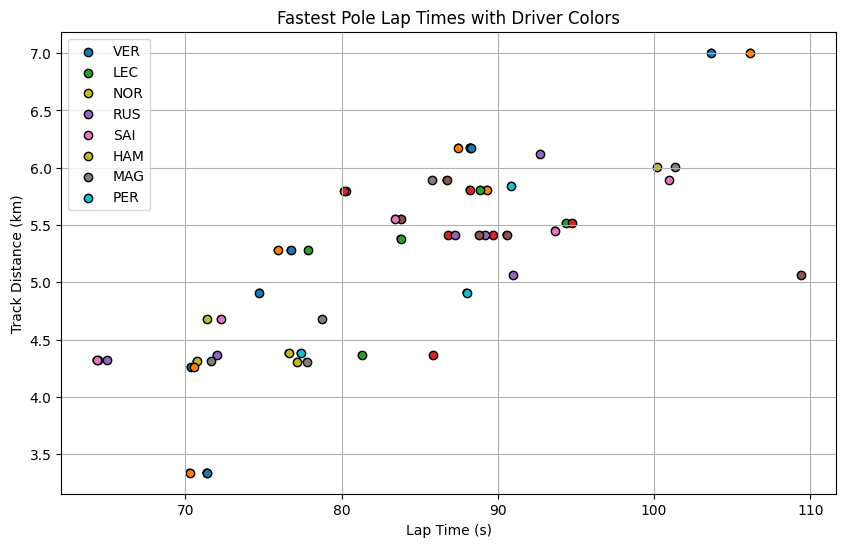

In [415]:
unique_drivers = qualifying_pole_position["code"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_drivers)))  # colormap
driver_color_map = {driver: colors[i] for i, driver in enumerate(unique_drivers)}

qualifying_pole_position["color"] = qualifying_pole_position["code"].map(driver_color_map)

added_labels = set()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    qualifying_pole_position["lap_time_seconds"], 
    qualifying_pole_position["Track Length (km)"], 
    c=qualifying_pole_position["color"].tolist(),  # colors for each point
    s=25,                  # marker size
    edgecolor="k"           # marker edge color
)

for i, driver in enumerate(qualifying_pole_position["code"]):
    if driver not in added_labels:
        plt.scatter(qualifying_pole_position["lap_time_seconds"][i], qualifying_pole_position["Track Length (km)"][i], label=driver, edgecolor="k")
        added_labels.add(driver)
    else:
        plt.scatter(qualifying_pole_position["lap_time_seconds"][i], qualifying_pole_position["Track Length (km)"][i], edgecolor="k")

plt.xlabel("Lap Time (s)")
plt.ylabel("Track Distance (km)")
plt.title("Fastest Pole Lap Times with Driver Colors")
plt.grid()
plt.legend()
plt.show()

In [416]:
results_2022.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25400,25406,1074,844,6,16,1,1,1,1,26.0,57,1:37:33.584,5853584,51,1,1:34.570,206.018,1
25401,25407,1074,832,6,55,3,2,2,2,18.0,57,+5.598,5859182,52,3,1:35.740,203.501,1
25402,25408,1074,1,131,44,5,3,3,3,15.0,57,+9.675,5863259,53,5,1:36.228,202.469,1
25403,25409,1074,847,131,63,9,4,4,4,12.0,57,+11.211,5864795,56,6,1:36.302,202.313,1
25404,25410,1074,825,210,20,7,5,5,5,10.0,57,+14.754,5868338,53,8,1:36.623,201.641,1


In [417]:
starting_pole = results_2022.loc[(results_2022['grid'] == 1)]
start_finish_pole = starting_pole.loc[(starting_pole['positionOrder'] == 1)]
not_start_finish_pole = starting_pole.loc[(starting_pole['positionOrder'] != 1)]

total_start_finish_pole = len(start_finish_pole)
total_not_start_finish_pole = len(not_start_finish_pole)
print(f'total number of times pole translated to a 1st place finish: {total_start_finish_pole}\ntotal number of times pole did not translate to a 1st place finish: {total_not_start_finish_pole}')

total number of times pole translated to a 1st place finish: 30
total number of times pole did not translate to a 1st place finish: 26


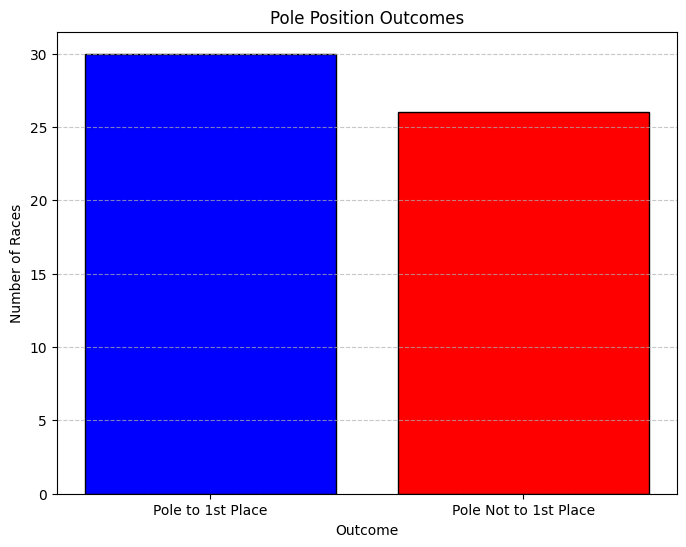

In [418]:
categories = ['Pole to 1st Place', 'Pole Not to 1st Place']
counts = [total_start_finish_pole, total_not_start_finish_pole]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red'], edgecolor='k')

plt.xlabel('Outcome')
plt.ylabel('Number of Races')
plt.title('Pole Position Outcomes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [419]:
races_2022.head()

,raceId,year,round,circuitId,name,date,time,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1036,1074,2022,1,3,Bahrain Grand Prix,2022-03-20,15:00:00,2022-03-18,12:00:00,2022-03-18,15:00:00,2022-03-19,12:00:00,2022-03-19,15:00:00,\N,\N
1058,1075,2022,2,77,Saudi Arabian Grand Prix,2022-03-27,17:00:00,2022-03-25,14:00:00,2022-03-25,17:00:00,2022-03-26,14:00:00,2022-03-26,17:00:00,\N,\N
1059,1076,2022,3,1,Australian Grand Prix,2022-04-10,05:00:00,2022-04-08,03:00:00,2022-04-08,06:00:00,2022-04-09,03:00:00,2022-04-09,06:00:00,\N,\N
1060,1077,2022,4,21,Emilia Romagna Grand Prix,2022-04-24,13:00:00,2022-04-22,11:30:00,2022-04-23,10:30:00,\N,\N,2022-04-22,15:00:00,2022-04-23,14:30:00
1061,1078,2022,5,79,Miami Grand Prix,2022-05-08,19:30:00,2022-05-06,18:30:00,2022-05-06,21:30:00,2022-05-07,17:00:00,2022-05-07,20:00:00,\N,\N


## Inference

In [420]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ks_2samp, ttest_ind

Something that I would want to infer about this data is that does qualifying result better indicate race result. <br><br><br>

Null: Starting from pole position does not significantly increase the likelihood of winning a race.<br><br>

Alternative: Starting from pole significantly increase the likelihood of winning a race.

In [421]:
infer_df = pd.merge( results_2022[['raceId', 'positionOrder', 'driverId']], qualifying_2022_circuit_driver_len, how = 'right', on = ['raceId', 'driverId'])
infer_df = infer_pd.rename(columns ={'positionOrder': 'raceFinishOrder', 'position': 'qualifyPosition'})
infer_df.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),code,GP_name,year,date,name,qualifyId,constructorId,number,qualifyPosition,q1,q2,q3
0,1076,4,1,1,5.278,HAM,Australian Grand Prix,2022,2022-04-10,Albert Park Grand Prix Circuit,9237.0,131.0,44.0,5.0,1:19.401,1:19.106,1:18.825
1,1100,2,1,1,5.278,HAM,Australian Grand Prix,2023,2023-04-02,Albert Park Grand Prix Circuit,9675.0,131.0,44.0,3.0,1:17.689,1:17.551,1:17.104
2,1123,18,1,1,5.278,HAM,Australian Grand Prix,2024,2024-03-24,Albert Park Grand Prix Circuit,10123.0,131.0,44.0,11.0,1:17.499,1:16.960,\N
3,1076,17,4,1,5.278,ALO,Australian Grand Prix,2022,2022-04-10,Albert Park Grand Prix Circuit,9242.0,214.0,14.0,10.0,1:19.192,1:18.815,\N
4,1100,3,4,1,5.278,ALO,Australian Grand Prix,2023,2023-04-02,Albert Park Grand Prix Circuit,9676.0,117.0,14.0,4.0,1:17.832,1:17.283,1:17.139


In [422]:
infer_df.replace(r'\\N', 0, regex=True, inplace=True)

In [423]:
infer_df["q1"] = infer_df["q1"].astype(str)
infer_df["q2"] = infer_df["q2"].astype(str)
infer_df["q3"] = infer_df["q3"].astype(str)

infer_df["q1_seconds"] = infer_df["q1"].apply(
    lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]) if ":" in x else float(x)
)
infer_df["q2_seconds"] = infer_df["q2"].apply(
    lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]) if ":" in x else float(x)
)
infer_df["q3_seconds"] = infer_df["q3"].apply(
    lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]) if ":" in x else float(x)
)

infer_df = infer_df.drop(columns = ['code', 'GP_name', 'date', 'name', 'qualifyId', 'constructorId', 'number', 'q1', 'q2', 'q3'])

infer_df.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds
0,1076,4,1,1,5.278,2022,5.0,79.401,79.106,78.825
1,1100,2,1,1,5.278,2023,3.0,77.689,77.551,77.104
2,1123,18,1,1,5.278,2024,11.0,77.499,76.960,0.000
3,1076,17,4,1,5.278,2022,10.0,79.192,78.815,0.000
4,1100,3,4,1,5.278,2023,4.0,77.832,77.283,77.139


I would say that typically drivers starting in the top 5 drivers from qualifying have the most likely chance of winning a race. However lets see a scatter plot of qualify position compared to finish position

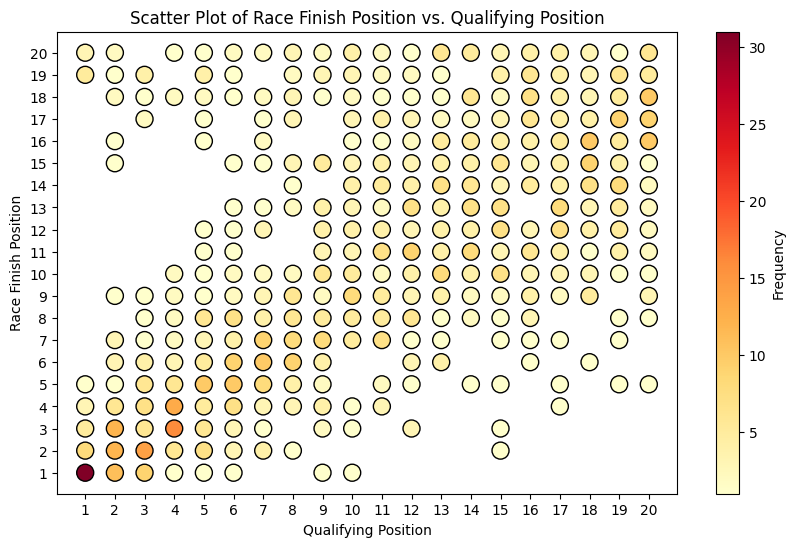

In [424]:
freq = infer_df.groupby(["qualifyPosition", "raceFinishOrder"]).size().reset_index(name="frequency")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    freq["qualifyPosition"], 
    freq["raceFinishOrder"], 
    s= 150,  
    c=freq["frequency"],        
    cmap="YlOrRd",             
    edgecolor="k"
)

plt.colorbar(scatter, label="Frequency")

plt.xlabel("Qualifying Position")
plt.ylabel("Race Finish Position")
plt.title("Scatter Plot of Race Finish Position vs. Qualifying Position")
plt.xticks(range(1, int(infer_df["qualifyPosition"].max()) + 1))
plt.yticks(range(1, infer_df["raceFinishOrder"].max() + 1))
plt.show()

In [425]:
infer_top5 = infer_df.loc[infer_df['qualifyPosition'] <= 5]
infer_top5.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds
0,1076,4,1,1,5.278,2022,5.0,79.401,79.106,78.825
1,1100,2,1,1,5.278,2023,3.0,77.689,77.551,77.104
4,1100,3,4,1,5.278,2023,4.0,77.832,77.283,77.139
12,1076,2,815,1,5.278,2022,3.0,78.834,78.340,78.240
14,1123,5,815,1,5.278,2024,3.0,76.805,76.631,76.274


In [426]:
infer_top5_finish_mean = np.mean(infer_df['raceFinishOrder'])
infer_top5_qual_mean = np.mean(infer_df['qualifyPosition'])
infer_top5_q3_mean = np.mean(infer_df['q3_seconds'])

print(f'Race Finish Mean: {infer_finish_mean} \nQualify Position Mean: {infer_top5_qual_mean} \nQ3 Time Mean: {infer_top5_q3_mean} seconds')

Race Finish Mean: 10.491510277033065 
Qualify Position Mean: 10.491510277033065 
Q3 Time Mean: 42.13754212454212 seconds


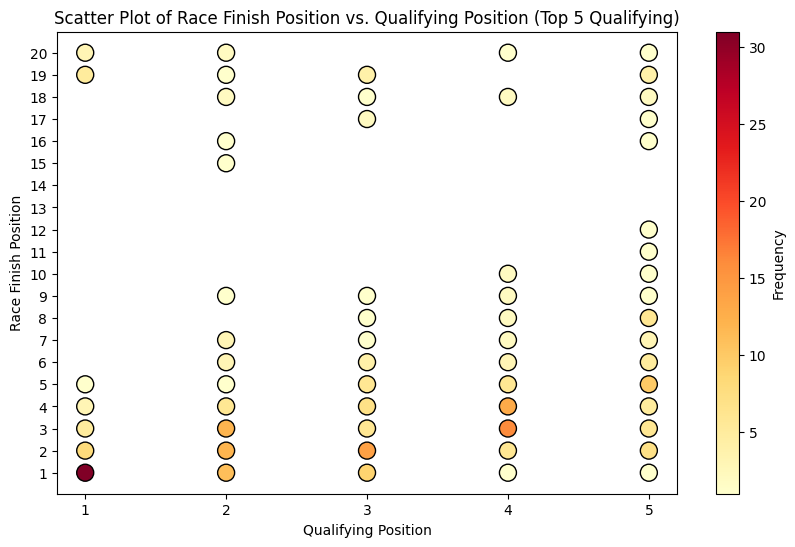

In [427]:
freq = infer_top5.groupby(["qualifyPosition", "raceFinishOrder"]).size().reset_index(name="frequency")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    freq["qualifyPosition"], 
    freq["raceFinishOrder"], 
    s= 150,  
    c=freq["frequency"],       
    cmap="YlOrRd",         
    edgecolor="k"
)

plt.colorbar(scatter, label="Frequency")
plt.xlabel("Qualifying Position")
plt.ylabel("Race Finish Position")
plt.title("Scatter Plot of Race Finish Position vs. Qualifying Position (Top 5 Qualifying)")
plt.xticks(range(1, int(infer_top5["qualifyPosition"].max()) + 1))
plt.yticks(range(1, infer_top5["raceFinishOrder"].max() + 1))
plt.show()

C:\Users\Jon\AppData\Local\Temp\ipykernel_4212\1123192028.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y="Race Position", data=comparison_df, palette="Set2")


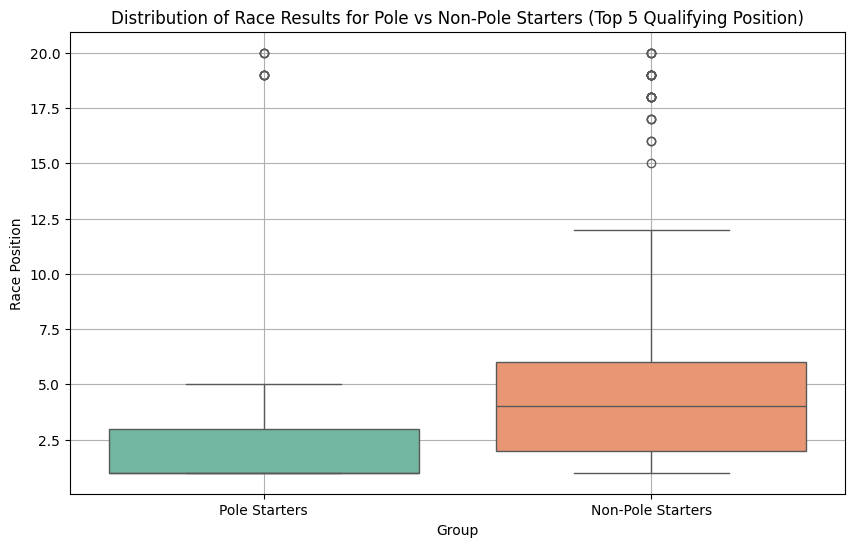

KS Statistic: 0.45535714285714285, P-value: 7.124847991706759e-09
The distributions are significantly different.


In [433]:
top_pole_starters = infer_top5.loc[infer_top5["qualifyPosition"] == 1, "raceFinishOrder"]
top_non_pole_starters = infer_top5.loc[infer_top5["qualifyPosition"] != 1, "raceFinishOrder"]

comparison_df = pd.DataFrame({
    "Group": ["Pole Starters"] * len(top_pole_starters) + ["Non-Pole Starters"] * len(top_non_pole_starters),
    "Race Position": pd.concat([top_pole_starters, top_non_pole_starters])
})

plt.figure(figsize=(10, 6))
sns.boxplot(x="Group", y="Race Position", data=comparison_df, palette="Set2")
plt.title("Distribution of Race Results for Pole vs Non-Pole Starters (Top 5 Qualifying Position)")
plt.ylabel("Race Position")
plt.xlabel("Group")
plt.grid()
plt.show()

ks_stat, ks_pvalue = ks_2samp(top_pole_starters, top_non_pole_starters)
print(f"KS Statistic: {ks_stat}, P-value: {ks_pvalue}")

if ks_pvalue < 0.05:
    print("The distributions are significantly different.")
else:
    print("The distributions are not significantly different.")

#### More analysis:

In [429]:
infer_total_pole_starters = infer_df[infer_df["qualifyPosition"] == 1]

pole_to_win = infer_total_pole_starters[infer_total_pole_starters["raceFinishOrder"] == 1]

total_pole = len(infer_total_pole_starters)
pole_to_win_count = len(pole_to_win)
pole_to_win_percentage = (pole_to_win_count / total_pole) * 100

print(f"Total Pole Starters: {total_pole}")
print(f"Pole to Win Count: {pole_to_win_count}")
print(f"Pole to Win Percentage: {pole_to_win_percentage:.2f}%")

Total Pole Starters: 56
Pole to Win Count: 31
Pole to Win Percentage: 55.36%


In [430]:
infer_pole_starters = infer_df.loc[infer_df["qualifyPosition"] == 1, "raceFinishOrder"]
infer_non_pole_starters = infer_df.loc[infer_df["qualifyPosition"] != 1, "raceFinishOrder"]

t_stat, p_value = ttest_ind(infer_pole_starters, infer_non_pole_starters, equal_var=False)
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in race results is statistically significant.")
else:
    print("The difference in race results is not statistically significant.")

T-Statistic: -7.70, P-Value: 0.0000
The difference in race results is statistically significant.


#### Now for Top 5 Qualifying

In [431]:
t_stat, p_value = ttest_ind(top_pole_starters, top_non_pole_starters, equal_var=False)
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("The difference in race results is statistically significant.")
else:
    print("The difference in race results is not statistically significant.")

T-Statistic: -1.57, P-Value: 0.1207
The difference in race results is not statistically significant.


### Evaluation

After doing some analysis based on the Null Hyothesis of "Starting from pole position does not significantly increase the likelihood of winning a race." and Alternative of "Starting from pole significantly increase the likelihood of winning a race." It would appear that for all position all position after qualifying, we strongly reject the Null and can state that qualifying position significantly increase the likelihood of winning a race. However when we look at the 5 Qualifying positions per races, we actually end up failing to reject the Null and conclude that qualifying position does not significantly increase the likelihood of winning races. <br>
This makes sense to me as typically a person qualifying below 10th position will not have a strong chance to win the race. However when looking at the top 5 positions, in a race season there are 2 or 3 teams that have competitive cars, that were engineered well enough, therefore 4-6 cars will most likely be competing for race wins, creating a scenario where the top 5 finishers have a good chance at winning despite not being pole.

## Prediction

One of the things I want to predict is the qualifying lap time for pole as the 2024 season has not completed.


This will be done with linear regression

In [485]:
predict_df = pd.merge( results_2022[['raceId', 'positionOrder', 'driverId']], qualifying_2022_circuit_driver_len, how = 'right', on = ['raceId', 'driverId'])
predict_df = predict_df.rename(columns ={'positionOrder': 'raceFinishOrder', 'position': 'qualifyPosition'})
predict_df.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),code,GP_name,year,date,name,qualifyId,constructorId,number,qualifyPosition,q1,q2,q3
0,1076,4,1,1,5.278,HAM,Australian Grand Prix,2022,2022-04-10,Albert Park Grand Prix Circuit,9237.0,131.0,44.0,5.0,1:19.401,1:19.106,1:18.825
1,1100,2,1,1,5.278,HAM,Australian Grand Prix,2023,2023-04-02,Albert Park Grand Prix Circuit,9675.0,131.0,44.0,3.0,1:17.689,1:17.551,1:17.104
2,1123,18,1,1,5.278,HAM,Australian Grand Prix,2024,2024-03-24,Albert Park Grand Prix Circuit,10123.0,131.0,44.0,11.0,1:17.499,1:16.960,\N
3,1076,17,4,1,5.278,ALO,Australian Grand Prix,2022,2022-04-10,Albert Park Grand Prix Circuit,9242.0,214.0,14.0,10.0,1:19.192,1:18.815,\N
4,1100,3,4,1,5.278,ALO,Australian Grand Prix,2023,2023-04-02,Albert Park Grand Prix Circuit,9676.0,117.0,14.0,4.0,1:17.832,1:17.283,1:17.139


In [486]:
predict_df.replace(r'\\N', 0, regex=True, inplace=True)

In [487]:
predict_df["q1"] = predict_df["q1"].astype(str)
predict_df["q2"] = predict_df["q2"].astype(str)
predict_df["q3"] = predict_df["q3"].astype(str)

predict_df["q1_seconds"] = predict_df["q1"].apply(
    lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]) if ":" in x else float(x)
)
predict_df["q2_seconds"] = predict_df["q2"].apply(
    lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]) if ":" in x else float(x)
)
predict_df["q3_seconds"] = predict_df["q3"].apply(
    lambda x: float(x.split(":")[0]) * 60 + float(x.split(":")[1]) if ":" in x else float(x)
)

predict_df = predict_df.drop(columns = ['code', 'GP_name', 'date', 'name', 'qualifyId', 'constructorId', 'number', 'q1', 'q2', 'q3'])

predict_df.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds
0,1076,4,1,1,5.278,2022,5.0,79.401,79.106,78.825
1,1100,2,1,1,5.278,2023,3.0,77.689,77.551,77.104
2,1123,18,1,1,5.278,2024,11.0,77.499,76.960,0.000
3,1076,17,4,1,5.278,2022,10.0,79.192,78.815,0.000
4,1100,3,4,1,5.278,2023,4.0,77.832,77.283,77.139


In [488]:
predict_df.shape

(1119, 10)

In [489]:
corr_predict = predict_df.corr().round(2)
corr_predict

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds
raceId,1.00,-0.00,0.05,0.00,-0.05,0.93,-0.00,-0.13,-0.02,0.01
raceFinishOrder,-0.00,1.00,0.15,0.00,-0.00,-0.00,0.63,-0.02,-0.39,-0.53
driverId,0.05,0.15,1.00,0.01,0.00,0.06,0.14,-0.02,-0.12,-0.18
circuitId,0.00,0.00,0.01,1.00,0.24,-0.02,0.00,0.07,0.05,0.02
Track Length (km),-0.05,-0.00,0.00,0.24,1.00,-0.03,-0.00,0.58,0.18,0.11
year,0.93,-0.00,0.06,-0.02,-0.03,1.00,-0.00,-0.14,-0.02,0.01
qualifyPosition,-0.00,0.63,0.14,0.00,-0.00,-0.00,1.00,-0.06,-0.72,-0.85
q1_seconds,-0.13,-0.02,-0.02,0.07,0.58,-0.14,-0.06,1.00,0.24,0.13
q2_seconds,-0.02,-0.39,-0.12,0.05,0.18,-0.02,-0.72,0.24,1.00,0.58
q3_seconds,0.01,-0.53,-0.18,0.02,0.11,0.01,-0.85,0.13,0.58,1.00


<Axes: >

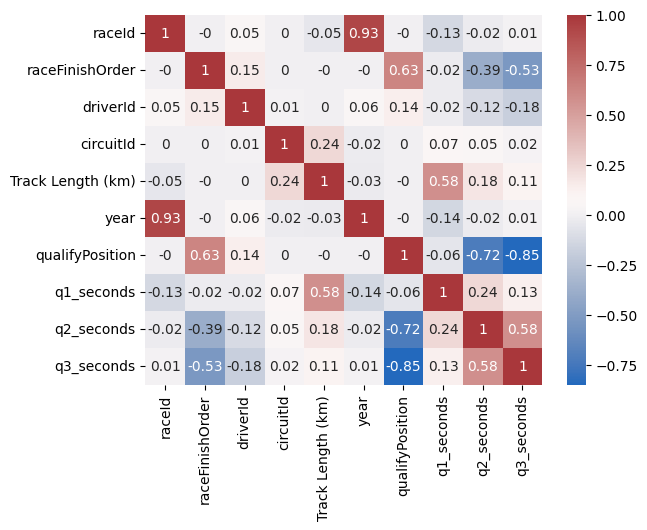

In [490]:
sns.heatmap(corr_predict, annot =True, cmap ='vlag')

In [491]:
X = predict_df[["Track Length (km)"]]
y = predict_df["q3_seconds"] 

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [493]:
model = LinearRegression()

model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 10.219995324518045
Coefficient: 6.0134794611688145


In [494]:
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1874.3935251087044
R² Score: -0.007893726489150987


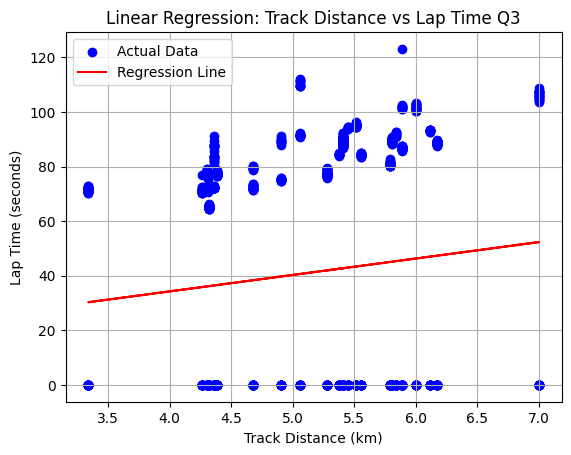

In [495]:
plt.scatter(X, y, color="blue", label="Actual Data")

plt.plot(X, model.predict(X), color="red", label="Regression Line")

plt.xlabel("Track Distance (km)")
plt.ylabel("Lap Time (seconds)")
plt.title("Linear Regression: Track Distance vs Lap Time Q3")
plt.legend()
plt.grid()
plt.show()

#### Try to evaluate Q3 times that aren't 0

In [496]:
non_zero_predict = predict_df.loc[predict_df['q3_seconds'] > 0]
non_zero_predict.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds
0,1076,4,1,1,5.278,2022,5.0,79.401,79.106,78.825
1,1100,2,1,1,5.278,2023,3.0,77.689,77.551,77.104
4,1100,3,4,1,5.278,2023,4.0,77.832,77.283,77.139
5,1123,8,4,1,5.278,2024,10.0,76.991,76.710,77.552
8,1100,13,842,1,5.278,2023,9.0,78.312,77.574,77.675


In [497]:
non_zero_predict.shape

(545, 10)

In [498]:
non_corr_predict = non_zero_predict.corr().round(2)
non_corr_predict

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds
raceId,1.00,-0.05,0.05,0.00,-0.05,0.93,0.02,-0.18,-0.19,-0.22
raceFinishOrder,-0.05,1.00,0.06,0.02,0.01,-0.06,0.42,0.05,0.05,0.06
driverId,0.05,0.06,1.00,0.02,-0.01,0.05,-0.12,-0.03,-0.03,-0.03
circuitId,0.00,0.02,0.02,1.00,0.25,-0.02,-0.00,0.11,0.14,0.13
Track Length (km),-0.05,0.01,-0.01,0.25,1.00,-0.03,0.01,0.74,0.76,0.75
year,0.93,-0.06,0.05,-0.02,-0.03,1.00,0.02,-0.19,-0.19,-0.21
qualifyPosition,0.02,0.42,-0.12,-0.00,0.01,0.02,1.00,0.03,0.03,0.06
q1_seconds,-0.18,0.05,-0.03,0.11,0.74,-0.19,0.03,1.00,0.99,0.96
q2_seconds,-0.19,0.05,-0.03,0.14,0.76,-0.19,0.03,0.99,1.00,0.98
q3_seconds,-0.22,0.06,-0.03,0.13,0.75,-0.21,0.06,0.96,0.98,1.00


<Axes: >

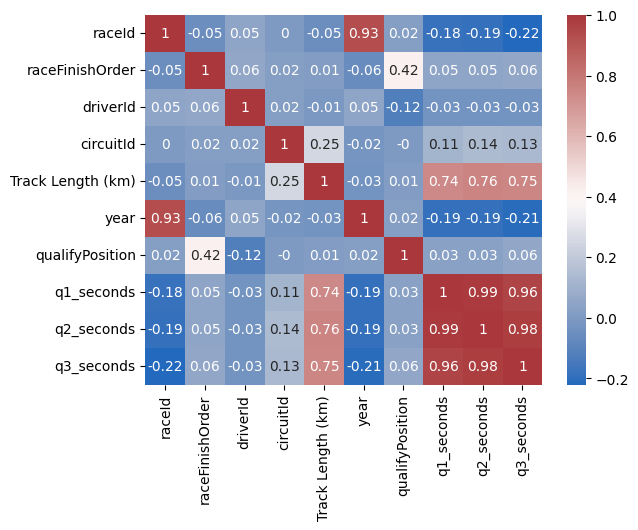

In [499]:
sns.heatmap(non_corr_predict, annot =True, cmap ='vlag')

In [500]:
non_X = non_zero_predict[["Track Length (km)"]]
non_y = non_zero_predict["q3_seconds"] 

In [501]:
non_X_train, non_X_test, non_y_train, non_y_test = train_test_split(non_X, non_y, test_size=0.2, random_state=42)

In [502]:
model = LinearRegression()

model.fit(non_X_train, non_y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 33.906671861432905
Coefficient: 9.818413224179123


In [503]:
non_y_pred = model.predict(non_X_test)

print("Mean Squared Error:", mean_squared_error(non_y_test, non_y_pred))
print("R² Score:", r2_score(non_y_test, non_y_pred))

Mean Squared Error: 44.61407950395631
R² Score: 0.5990640405350192


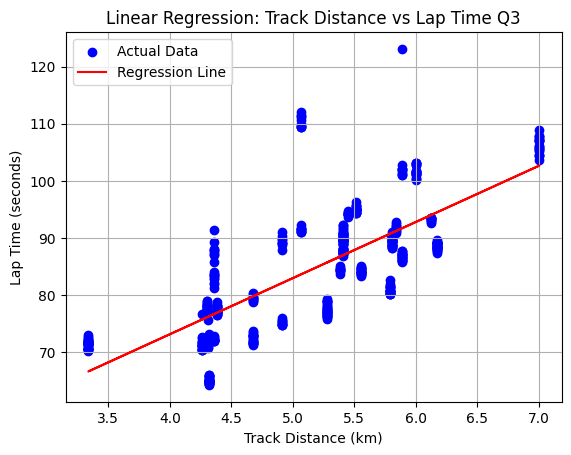

In [504]:
plt.scatter(non_X, non_y, color="blue", label="Actual Data")

plt.plot(non_X, model.predict(non_X), color="red", label="Regression Line")

plt.xlabel("Track Distance (km)")
plt.ylabel("Lap Time (seconds)")
plt.title("Linear Regression: Track Distance vs Lap Time Q3")
plt.legend()
plt.grid()
plt.show()

#### Predicting Position based on Q3 laptimes and track distance

In [505]:
non_zero_predict_multi = non_zero_predict
non_zero_predict_multi.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds
0,1076,4,1,1,5.278,2022,5.0,79.401,79.106,78.825
1,1100,2,1,1,5.278,2023,3.0,77.689,77.551,77.104
4,1100,3,4,1,5.278,2023,4.0,77.832,77.283,77.139
5,1123,8,4,1,5.278,2024,10.0,76.991,76.710,77.552
8,1100,13,842,1,5.278,2023,9.0,78.312,77.574,77.675


In [506]:
fastest_q3 = non_zero_predict_multi.groupby('raceId')['q3_seconds'].min().reset_index()

fastest_q3.rename(columns={'q3_seconds': 'pole_time'}, inplace=True)

non_zero_predict_multi = non_zero_predict_multi.merge(fastest_q3, on='raceId', how='left')
non_zero_predict_multi.head()

,raceId,raceFinishOrder,driverId,circuitId,Track Length (km),year,qualifyPosition,q1_seconds,q2_seconds,q3_seconds,pole_time
0,1076,4,1,1,5.278,2022,5.0,79.401,79.106,78.825,77.868
1,1100,2,1,1,5.278,2023,3.0,77.689,77.551,77.104,76.732
2,1100,3,4,1,5.278,2023,4.0,77.832,77.283,77.139,76.732
3,1123,8,4,1,5.278,2024,10.0,76.991,76.710,77.552,75.915
4,1100,13,842,1,5.278,2023,9.0,78.312,77.574,77.675,76.732


In [514]:
multi_X = non_zero_predict_multi[["qualifyPosition", "q1_seconds", "q2_seconds", "q3_seconds", "Track Length (km)"]]
multi_y = non_zero_predict_multi["pole_time"]

In [515]:
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_X, multi_y, test_size=0.2, random_state=42)

In [516]:
model = LinearRegression()

model.fit(multi_X_train, multi_y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

feature_names = X.columns
coef_map = {feature: coef for feature, coef in zip(feature_names, model.coef_)}
print("Feature Coefficients:", coef_map)

Intercept: 1.8830466866948257
Coefficients: [-0.16465822 -0.12195438  0.32690873  0.76381772  0.17896776]
Feature Coefficients: {'Track Length (km)': -0.1646582194928803}


In [517]:
multi_y_pred = model.predict(multi_X_test)

print("Predicted Fastest Q3 Times:", multi_y_pred)
print("Actual Fastest Q3 Times:", multi_y_test.values)

Predicted Fastest Q3 Times: [ 88.95178744  71.03622587  83.27428724  71.32281544  88.26871205
 106.71868279  77.15301141  90.66092853  83.7295471   93.9864129
  78.09064065  87.18890102  94.11494158  94.37253258  87.25521598
  88.35899119  88.21093558  89.34969222  99.965401    88.3337441
  71.53523907  86.84933679  88.3204305   86.72255347  87.69413335
  76.86167488 101.64405983  76.10349675  77.02520301  83.92361028
  78.91769759  70.55427038  79.10887374  87.94895912  70.3936612
  74.74481492 104.21706933  64.6799815   70.69831324  88.53254676
 100.90126389  76.9491756   72.29839212 106.39396677  64.64333221
  93.61928836  78.89936871  81.57820318  99.88320992  86.87140122
  89.16133361  88.65304484  86.31217963  88.17375918  64.96602562
  86.61871377  78.30917922  86.57049743  71.16549325  99.87429422
  92.36700658  70.48474194  80.37790708 100.04181494 108.87327256
  71.46875328  78.92483998  77.05419908  90.33325053  72.38093936
  77.59033385  85.73393675  83.8515092   71.7464575

In [518]:
mse = mean_squared_error(multi_y_test, multi_y_pred)
rmse = mse ** 0.5
r2 = r2_score(multi_y_test, multi_y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 0.38073623897902176
Root Mean Squared Error (RMSE): 0.6170382799948653
R² Score: 0.9965314975022141


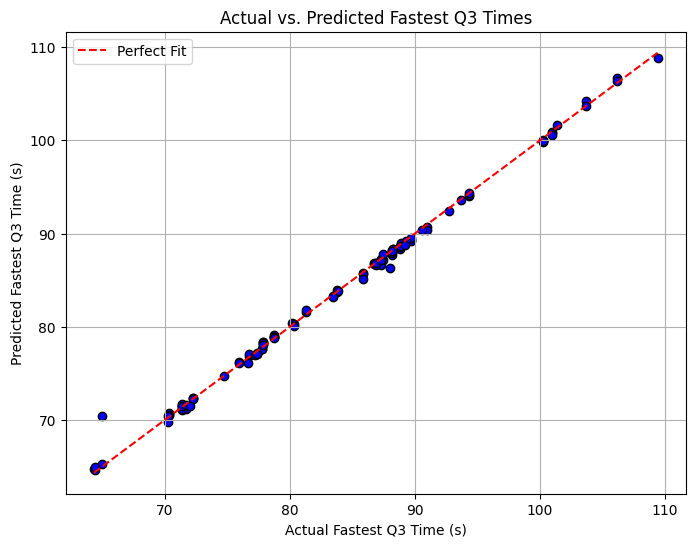

In [519]:
plt.figure(figsize=(8, 6))
plt.scatter(multi_y_test, multi_y_pred, color="blue", edgecolor="k")
plt.plot([min(multi_y_test), max(multi_y_test)], [min(multi_y_test), max(multi_y_test)], color="red", linestyle="--", label="Perfect Fit")
plt.title("Actual vs. Predicted Fastest Q3 Times")
plt.xlabel("Actual Fastest Q3 Time (s)")
plt.ylabel("Predicted Fastest Q3 Time (s)")
plt.legend()
plt.grid()
plt.show()

## Evaluation

Our use of Linear Regression for Track on all data does not seem to produce a good prediction to pole qualifying time. This is mostly likely because half the grid does not participate in Q3, therefore every race there are 10 entries of Q3 data with 0 seconds as the lap time. This would heavily skew the data to produce unfavorable prediction. Where as when we narrow or data to entries of non-zero Q3 times, we get a much more accurate prediction for Q3 lap times.<br>
Next using multi variable linear regression, I looked to predict the pole qualifying time, based on q1, q2, q3, qualifying position, and track distance. And it made a pretty accurate predtion for pole time based on these variables. With this data we were able to get a MSE of 0.3807 RMSE of 0.617 and R² of 0.9965. Our MSE being small tells us that our prediction are quite close to the actual times. Our RMSE informs us that the predictions on average divate from the actaul times by about 0.617 seconds. And lastly R² tell us that 99.65% of the variance is explained by our variables. Over well we can see that our model is quite good and accurate. I will say for a prediction model having a small divation is quite good. However, in Formula 1 lap times in qualifying come down to the thousandths of a second, this model might actually be bad for a driver trying to predict P1 qualifying time for a certain track.
